# Mercedez Benz Greener Manufacturing



**Problem Statement: -** Reduce the time that cars spend on the test bench.Analyze different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Daimler’s standards.

**Actions to be taken: -**
1. If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
2. Check for null and unique values for test and train sets
3. Apply label encoder.
4. Perform dimensionality reduction.
5. Predict your test_df values using xgboost



In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load datasets
df_train = pd.read_csv('train.csv',index_col ='ID')
df_test = pd.read_csv('test.csv',index_col = 'ID')
print('Training data shape:', df_train.shape)
print('Testing data shape :', df_test.shape)

Training data shape: (4209, 377)
Testing data shape : (4209, 376)


In [3]:
#  X columns -Train dataset
df_train_X = df_train.drop(['y'],axis=1)
print('Training data shape:', df_train_X.shape)

Training data shape: (4209, 376)


In [4]:
df_train_X.head(2)

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,
0,k,v,at,a,d,u,j,o,0,0,...,0,0,1,0,0,0,0,0,0,0
6,k,t,av,e,d,y,l,o,0,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
df_test.head(2)

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,
1,az,v,n,f,d,t,a,w,0,0,...,0,0,0,1,0,0,0,0,0,0
2,t,b,ai,a,d,b,g,y,0,0,...,0,0,1,0,0,0,0,0,0,0


In [6]:
y = df_train[['y']]
y.shape

(4209, 1)

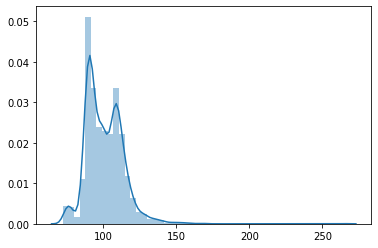

In [7]:
sns.distplot(y)

### 1. Remove columns which variance is equal to zero

In [10]:
#identify columns variance is equal to zero

cols_to_drop=[]

for col in df_train_X.columns:
    if df_train_X[col].dtype=='int64' and df_train_X[col].var()==0:
        cols_to_drop.append(col)
print('Below are 12 columns which variance is equal to Zero')
print(cols_to_drop)

Below are 12 columns which variance is equal to Zero
['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']


In [11]:
# drop columns variance is equal to zero
df_train_X.drop(columns = cols_to_drop,inplace =True)
print(df_train_X.shape)

(4209, 364)


### 2. Check null and unique values of training and testing data set

In [12]:
# check missing values in training and testing data set

print('Total Null values in training data set: ',df_train_X.isnull().sum().sum())
print('Total Null values in testing data set: ',df_test.isnull().sum().sum())

Total Null values in training data set:  0
Total Null values in testing data set:  0


In [13]:
# Column wise unique values in training data set

unique_train = df_train_X.nunique(dropna=False)
unique_val_train = unique_train.to_frame().reset_index().rename({'col':'count'}, axis='columns')
print ('Below are the column wise unique values in Training data set : ')
unique_val_train.T

Below are the column wise unique values in Training data set : 


,0,1,2,3,4,5,6,7,8,9,...,354,355,356,357,358,359,360,361,362,363
index,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,47,27,44,7,4,29,12,25,2,2,...,2,2,2,2,2,2,2,2,2,2


In [14]:
unique_test = df_test.nunique(dropna=False)
unique_val_test = unique_test.to_frame().reset_index().rename({'col':'count'}, axis='columns')
print ('Below are the column wise unique values in Testing data set : ')
unique_val_test.T

Below are the column wise unique values in Testing data set : 


,0,1,2,3,4,5,6,7,8,9,...,366,367,368,369,370,371,372,373,374,375
index,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,49,27,45,7,4,32,12,25,2,2,...,2,2,2,2,2,2,2,2,2,2


In [15]:
#Q1 = df_train_X.quantile(0.25)
#Q3 = df_train_X.quantile(0.75)
#IQR = Q3 - Q1


In [16]:
#df_train_X1 = df_train_X[~((df_train_X < (Q1 - 1.5 * IQR)) |(df_train_X > (Q3 + 1.5 * IQR))).any(axis=1)]

### 3. Apply LabelEncoder

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
# identify categorical columns

cat_cols_train = [col for col in df_train_X.columns if df_train[col].dtype=='object']
cat_cols_test = [col for col in df_test.columns if df_test[col].dtype=='object']
print(cat_cols_train)
print(cat_cols_test)

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


In [19]:
# Apply label encoder on training dataset 

le=LabelEncoder()
for col in cat_cols_train:
    le.fit(df_train_X[col])
    df_train_X[col]=le.transform(df_train_X[col])
    

In [20]:
df_train_X.head(2)

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
6,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0


In [21]:
df_train_X.describe()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,29.760751,11.113566,17.306486,2.919696,2.997862,13.340223,6.807318,11.611309,0.013305,0.075077,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,13.738338,8.531001,10.899914,1.739912,0.073900,8.250832,2.916973,7.037888,0.114590,0.263547,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,3.000000,8.000000,2.000000,3.000000,5.000000,6.000000,5.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.000000,13.000000,16.000000,2.000000,3.000000,15.000000,7.000000,11.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,20.000000,25.000000,5.000000,3.000000,21.000000,9.000000,18.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,46.000000,26.000000,43.000000,6.000000,3.000000,28.000000,11.000000,24.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
y.describe()

,y
count,4209.000000
mean,100.669318
std,12.679381
min,72.110000
25%,90.820000
50%,99.150000
75%,109.010000
max,265.320000


In [23]:
# Scale the data for analysis

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_train_X_std = sc.fit_transform(df_train_X)
df_train_X_std =pd.DataFrame(df_train_X_std,columns =df_train_X.columns )
df_train_X_std
df_train_X =df_train_X_std

In [24]:
df_train_X.head(2)

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0.163012,1.393488,-0.028122,-1.678270,0.028938,1.292117,0.751787,0.339445,-0.116122,-0.284906,...,-0.684167,-0.246447,1.475332,-0.14528,-0.097952,-0.090243,-0.087527,-0.040815,-0.021804,-0.037783
1,0.163012,1.159021,0.155388,0.620969,0.028938,1.776974,1.437511,0.339445,-0.116122,-0.284906,...,1.461630,-0.246447,-0.677814,-0.14528,-0.097952,-0.090243,-0.087527,-0.040815,-0.021804,-0.037783


### 4. Perform dimensionality reduction by using PCA

In [25]:
#train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df_train_X, y, train_size=0.7,test_size=0.3,random_state=42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(2946, 364) (2946, 1)
(1263, 364) (1263, 1)


In [26]:
from sklearn.decomposition import  PCA
pca=PCA()

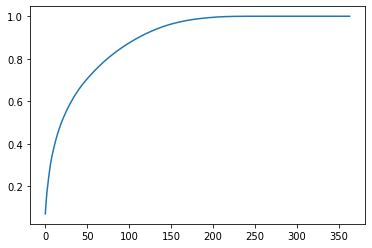

In [27]:
X_train_pca = pd.DataFrame(pca.fit_transform(X_train))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [28]:
#with n n_components=180
pca_1=PCA(n_components=180)

X_train_pca_1=pd.DataFrame(pca_1.fit_transform(X_train),columns=list(range(0,180)))
X_test_pca_1 = pd.DataFrame(pca_1.fit_transform(X_test))
X_test_pca_1.shape


(1263, 180)

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_pca = pd.DataFrame()
vif_pca["VIF Factor_PCA"] = [variance_inflation_factor(X_train_pca_1.values, i) for i in range(X_train_pca_1.shape[1])]

vif_pca['Column Name']=X_train_pca_1.columns

vif_pca.T

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
VIF Factor_PCA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Column Name,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,170.0,171.0,172.0,173.0,174.0,175.0,176.0,177.0,178.0,179.0


In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif['Column Name']=X_train.columns
vif.T


,0,1,2,3,4,5,6,7,8,9,...,354,355,356,357,358,359,360,361,362,363
VIF Factor,2.71055,6.34673,19.8121,2.89787,1.05506,1.25013,1.30545,1.22594,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,1.52709,1.46374,inf
Column Name,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385


In [31]:
# Multiple linear regression algorithm with PCA

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

lin_reg=LinearRegression()

lin_reg.fit(X_train_pca_1,y_train)

y_linreg_pred=lin_reg.predict(X_test_pca_1)

r2_score(y_true=y_test,y_pred=y_linreg_pred)
print('Train Score:---------------',lin_reg.score(X_train_pca_1,y_train))
print('Test Score:----------------',lin_reg.score(X_test_pca_1,y_test))
print('model mean_squared_error: -',mean_squared_error(y_test, y_linreg_pred))


Train Score:--------------- 0.6195456606450848
Test Score:---------------- -0.1274102064404281
model mean_squared_error: - 201.5551597863467


In [32]:
#Randomforest algorithm with PCA

from sklearn.ensemble import RandomForestRegressor
randf = RandomForestRegressor()
randf.fit(X_train_pca_1, y_train)
randf_pred = randf.predict(X_test_pca_1)
print(r2_score(y_test, randf_pred))
print(mean_squared_error(y_test,randf_pred))

-0.032360524723865414
184.56245058734987


In [33]:
# Multiple linear regression algorithm without PCA

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

lin_reg=LinearRegression()

lin_reg.fit(X_train,y_train)

y_linreg_pred=lin_reg.predict(X_test)

r2_score(y_true=y_test,y_pred=y_linreg_pred)
print('Train Score:---------------',lin_reg.score(X_train,y_train))
print('Test Score:----------------',lin_reg.score(X_test,y_test))
print('model mean_squared_error: -',mean_squared_error(y_test, y_linreg_pred))

Train Score:--------------- 0.6290819840557061
Test Score:---------------- -7.560015398956941e+24
model mean_squared_error: - 1.3515578473739164e+27


In [34]:
#Randomforest algorithm without PCA

from sklearn.ensemble import RandomForestRegressor
randf = RandomForestRegressor()
randf.fit(X_train, y_train)
pred = randf.predict(X_test)
print("R2 Value: %.2f" % r2_score(y_test, pred))
print('mean_squared_error :% .2f' % mean_squared_error(y_test,pred))
print('RMSE: %.2f' % sqrt(mean_squared_error(y_test,pred)))

R2 Value: 0.38
mean_squared_error : 110.75
RMSE: 10.52


In [35]:
#Ridge regression

from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.1, normalize=True)
ridgeReg.fit(X_train,y_train)
print('R2 Value/Coefficient of Determination: {}'.format(ridgeReg.score(X_test, y_test)))
print('mean_squared_error :',sqrt(mean_squared_error(y_test, ridgeReg.predict(X_test))))
print('RMSE: %.2f' % sqrt(mean_squared_error(y_train, ridgeReg.predict(X_train))))

R2 Value/Coefficient of Determination: -78449.45823881731
mean_squared_error : 3745.016379653995
RMSE: 7.58


In [36]:
# Dimention reduction and minimise overfitting by using Lasso regression

from sklearn.linear_model import Lasso

lasso=Lasso(alpha= 0.15)
lasso.fit(X_train,y_train)
y_lasso_pred=lasso.predict(X_test)
print(("R2 Value: %.2f" %lasso.score(X_test, y_test)))
print('mean_squared_error :% .2f' % mean_squared_error(y_test,y_lasso_pred))
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test,y_lasso_pred)))

R2 Value: 0.48
mean_squared_error : 93.16
RMSE: 9.65


### 5. Predict your test_df values using xgboost

In [37]:
#XGBoost

import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold

In [38]:
xgbr = xgb.XGBRegressor(random_state=42,silent=True)

In [39]:
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1, verbosity=1)

In [40]:
# Cross validation
scores = cross_val_score(xgbr, X_train,y_train,cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.59


In [41]:
scores = cross_val_score(xgbr, X_train,y_train,cv=5,scoring ='r2')
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.59


In [42]:
# Cross validation with kfold method
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.59


In [43]:
# XGboost prediction

y_pred = xgbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("R2 Value: %.2f" % xgbr.score(X_test,y_test))
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))


R2 Value: 0.49
MSE: 91.41
RMSE: 9.56
